In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import requests
import time
import random
import csv
import scipy.stats as st
from scipy.stats import linregress


csv_path2021="FilteredData/Happiness2021.csv"
new_df2021=pd.read_csv(csv_path2021)
new_df2021.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Confidence in national government
0,Albania,2021,5.255482,9.562287,0.701883,69.150002,0.827453,0.044742,0.896127,0.472924
1,Argentina,2021,5.908279,9.955421,0.882305,67.199997,0.819479,-0.008816,0.816257,0.326574
2,Armenia,2021,5.300569,9.500485,0.762044,67.650002,0.795170,-0.150132,0.705334,0.297146
3,Australia,2021,7.111599,10.818342,0.919755,71.050003,0.912402,0.237518,0.453676,0.519226
4,Austria,2021,7.079641,10.892092,0.862976,71.150002,0.794846,0.161673,0.500809,0.610459


In [2]:
csv_pathaus="FilteredData/AustraliaData.csv"
df_aus=pd.read_csv(csv_pathaus)
df_aus.head(15)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Confidence in national government
0,Australia,2007,7.285391,10.693600,0.965276,69.959999,0.890682,0.345244,0.512578,0.526933
1,Australia,2008,7.253757,10.708705,0.946635,70.040001,0.915733,0.303524,0.430811,0.644675
2,Australia,2010,7.450047,10.712526,0.954520,70.199997,0.932059,0.314949,0.366127,0.609753
3,Australia,2011,7.405616,10.723029,0.967029,70.279999,0.944586,0.367531,0.381772,0.530787
4,Australia,2012,7.195586,10.743997,0.944599,70.360001,0.935146,0.271807,0.368252,0.420419
5,Australia,2013,7.364169,10.752455,0.928205,70.440002,0.933379,0.266937,0.431539,0.455871
6,Australia,2014,7.288550,10.762845,0.923799,70.519997,0.922932,0.316679,0.442021,0.464676
7,Australia,2015,7.309061,10.769942,0.951862,70.599998,0.921871,0.330029,0.356554,0.478557
8,Australia,2016,7.250080,10.781371,0.942334,70.675003,0.922316,0.236698,0.398545,0.452732
9,Australia,2017,7.257038,10.787225,0.949958,70.750000,0.910550,0.315514,0.411347,0.453407


In [3]:
new_df_generositypositive2021=new_df2021[new_df2021['Generosity']>0]
new_df_generositypositive2021

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Confidence in national government
0,Albania,2021,5.255482,9.562287,0.701883,69.150002,0.827453,0.044742,0.896127,0.472924
3,Australia,2021,7.111599,10.818342,0.919755,71.050003,0.912402,0.237518,0.453676,0.519226
4,Austria,2021,7.079641,10.892092,0.862976,71.150002,0.794846,0.161673,0.500809,0.610459
7,Bosnia and Herzegovina,2021,5.748823,9.627625,0.859954,67.300003,0.758979,0.281281,0.920914,0.225853
8,Brazil,2021,6.009953,9.593187,0.814329,65.750000,0.791508,0.090771,0.738571,0.327099
10,Burkina Faso,2021,4.635509,7.713551,0.657544,55.650002,0.644102,0.067472,0.736159,0.620852
12,Canada,2021,6.939435,10.770748,0.926076,71.400002,0.898229,0.193241,0.383990,0.610411
17,Croatia,2021,6.286790,10.300449,0.917742,68.949997,0.841838,0.009498,0.933650,0.251288
18,Czechia,2021,6.942497,10.581284,0.950227,69.050003,0.890521,0.163304,0.862574,0.284475
19,Denmark,2021,7.698747,10.972980,0.944927,71.250000,0.933439,0.132816,0.172681,0.651710


Text(0.5, 1.0, '2021 Data')

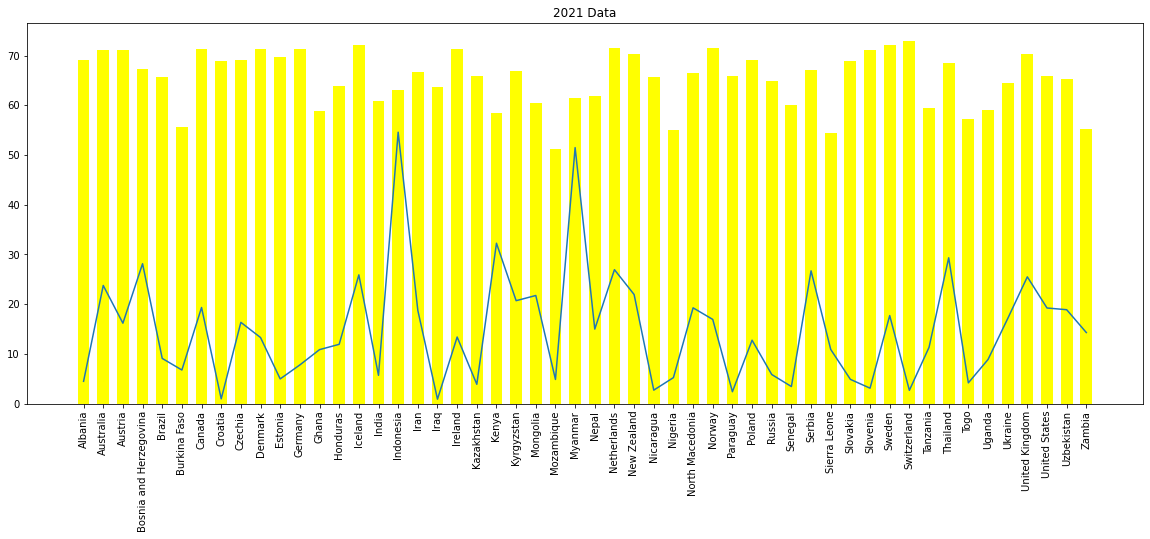

In [74]:
# Code for positive genorosity and Countries
countries = list(new_df_generositypositive2021['Country name'])
#values = list(data.values())
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.plot(countries,new_df_generositypositive2021['Generosity']*100)
plt.bar(countries,new_df_generositypositive2021['Healthy life expectancy at birth'],color ='yellow', width = 0.6)
plt.xticks(rotation='vertical')
plt.yticks(rotation='horizontal')

plt.title("2021 Data")
#plt.xlabel()

In [5]:
new_df_generositynegative2021=new_df2021[new_df2021['Generosity']<=0]
new_df_generositynegative2021

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Confidence in national government
1,Argentina,2021,5.908279,9.955421,0.882305,67.199997,0.819479,-0.008816,0.816257,0.326574
2,Armenia,2021,5.300569,9.500485,0.762044,67.650002,0.795170,-0.150132,0.705334,0.297146
5,Benin,2021,4.493431,8.140854,0.435524,56.099998,0.724062,-0.013508,0.612547,0.762416
6,Bolivia,2021,5.568624,9.007940,0.797810,63.599998,0.861731,-0.054499,0.812174,0.385876
9,Bulgaria,2021,5.421693,10.054126,0.883621,66.500000,0.841188,-0.010517,0.891248,0.224526
11,Cameroon,2021,4.962748,8.215063,0.694936,55.849998,0.715302,-0.023983,0.848717,0.563208
13,Chile,2021,6.435631,10.162443,0.891461,70.300003,0.803415,-0.049181,0.858553,0.232145
14,Colombia,2021,5.289958,9.587849,0.792831,69.349998,0.774668,-0.060749,0.831331,0.289149
15,Congo (Brazzaville),2021,4.920531,8.103173,0.567651,56.849998,0.737661,-0.018991,0.732730,0.522122
16,Costa Rica,2021,6.408448,9.938294,0.876052,70.000000,0.886652,-0.023067,0.781827,0.315308


Text(0.5, 1.0, '2021 Data')

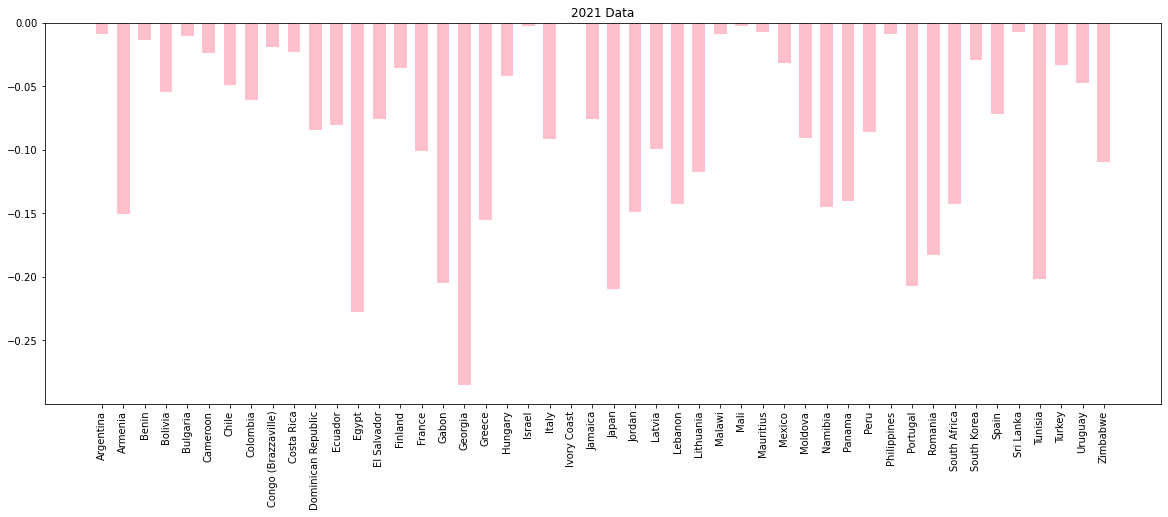

In [6]:
countries = list(new_df_generositynegative2021['Country name'])
#values = list(data.values())
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.bar(countries,new_df_generositynegative2021['Generosity'],color ='pink', width = 0.6)
plt.xticks(rotation='vertical')
plt.yticks(rotation='horizontal')

plt.title("2021 Data")
#plt.xlabel()

Text(0.5, 1.0, '2021 Data')

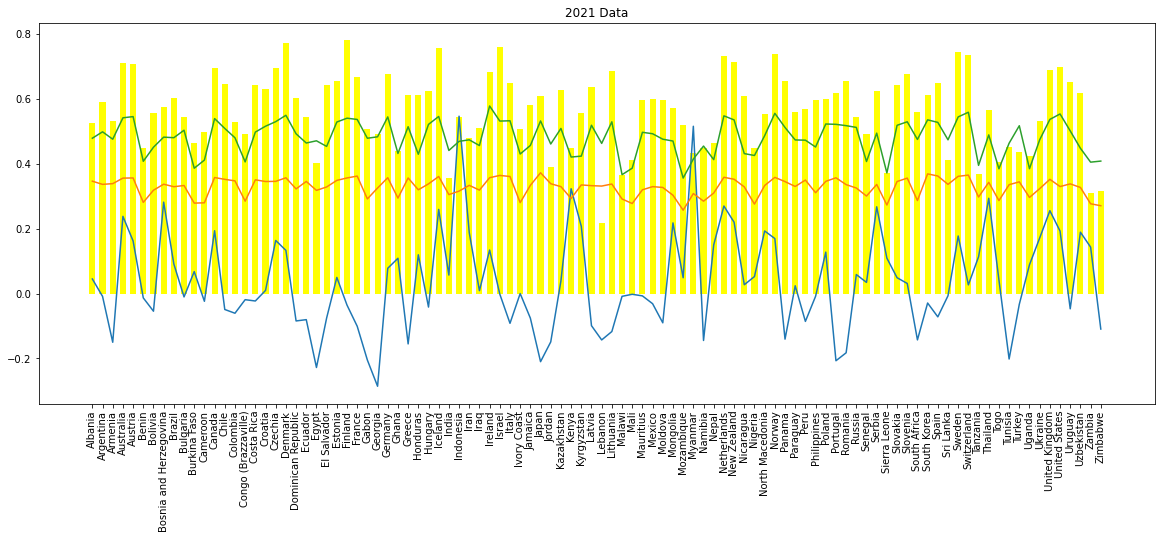

In [101]:
# Generosity vs Countries
countries = list(new_df2021['Country name'])
#values = list(data.values())
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.bar(countries,new_df2021['Life Ladder']/10,color ='yellow', width = 0.6)
plt.plot(countries,new_df2021['Generosity'])
plt.plot(countries,new_df2021['Healthy life expectancy at birth']/200)
plt.plot(countries,new_df2021['Log GDP per capita']/20)
plt.xticks(rotation='vertical')
plt.yticks(rotation='horizontal')

plt.title("2021 Data")
#plt.xlabel()

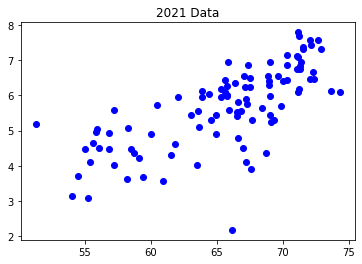

<Figure size 1440x504 with 0 Axes>

In [8]:
# Healthy life expectancy vs Life ladder(Happiness score)

healthylife2021 = list(new_df2021['Healthy life expectancy at birth'])
lifeladder2021 = list(new_df2021['Life Ladder'])
#values = list(data.values())
# Figure Size
plt.title("2021 Data")
plt.scatter(healthylife2021, lifeladder2021, c ="blue")
fig = plt.figure(figsize =(20, 7))

#plt.bar(countries,new_df2021['Generosity'],color ='pink', width = 0.6)
#plt.xticks(rotation='vertical')
#plt.yticks(rotation='horizontal')


#plt.xlabel()

The r-squared is: 0.7525134255636778


Country name                         50
year                                 50
Life Ladder                          50
Log GDP per capita                   50
Social support                       50
Healthy life expectancy at birth     50
Freedom to make life choices         50
Generosity                           50
Perceptions of corruption            50
Confidence in national government    50
dtype: int64

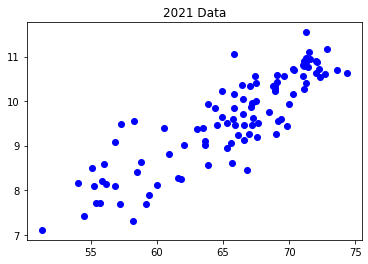

<Figure size 1440x504 with 0 Axes>

In [41]:
# Healthy life expectancy vs GDP 
healthylife2021 = list(new_df2021['Healthy life expectancy at birth'])
gdp2021 = list(new_df2021['Log GDP per capita'])
#lifeladder2021 = list(new_df2021['Life Ladder'])
#values = list(data.values())
# Figure Size
plt.title("2021 Data")
plt.scatter(healthylife2021, gdp2021, c ="blue")
fig = plt.figure(figsize =(20, 7))
#plt.bar(countries,new_df2021['Generosity'],color ='pink', width = 0.6)
#plt.xticks(rotation='vertical')
#plt.yticks(rotation='horizontal')

print(f"The r-squared is: {rvalue**2}")
#plt.xlabel()




meanGDP=new_df2021['Log GDP per capita'].mean()
meanGDP

new_df_abovemeanGDP=new_df2021[new_df2021['Log GDP per capita']>=meanGDP]
new_df_abovemeanGDP.count()

new_df_belowmeanGDP=new_df2021[new_df2021['Log GDP per capita']<meanGDP]
new_df_belowmeanGDP.count()




In [10]:
y_values = list(new_df2021['Healthy life expectancy at birth'])
x_values = list(new_df2021['Log GDP per capita'])
y_values

[69.1500015258789,
 67.19999694824219,
 67.6500015258789,
 71.05000305175781,
 71.1500015258789,
 56.09999847412109,
 63.59999847412109,
 67.30000305175781,
 65.75,
 66.5,
 55.650001525878906,
 55.84999847412109,
 71.4000015258789,
 70.30000305175781,
 69.3499984741211,
 56.84999847412109,
 70.0,
 68.94999694824219,
 69.05000305175781,
 71.25,
 64.4000015258789,
 69.0,
 63.5,
 65.5999984741211,
 69.6500015258789,
 71.1500015258789,
 72.30000305175781,
 58.25,
 64.94999694824219,
 71.30000305175781,
 58.75,
 71.1500015258789,
 63.84999847412109,
 67.5,
 72.05000305175781,
 60.900001525878906,
 63.04999923706055,
 66.5999984741211,
 63.650001525878906,
 71.30000305175781,
 72.69999694824219,
 72.05000305175781,
 55.95000076293945,
 66.5999984741211,
 74.3499984741211,
 67.5999984741211,
 65.80000305175781,
 58.5,
 66.8499984741211,
 66.4000015258789,
 66.1500015258789,
 67.4000015258789,
 58.20000076293945,
 55.400001525878906,
 63.84999847412109,
 65.80000305175781,
 65.30000305175781,


ValueError: x and y must have same first dimension, but have shapes (100,) and (400,)

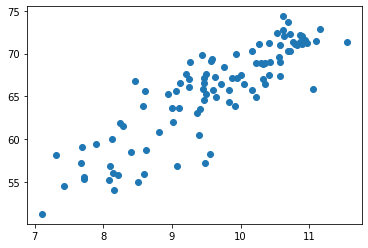

In [42]:
# to work on this code
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#regress_values =( x_values * slope) + intercept

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values *int(slope) + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
#plt.plot(x_values,regress_values,"r-")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.0,0.8),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Confidence in national government
0,Australia,2007,7.285391,10.693600,0.965276,69.959999,0.890682,0.345244,0.512578,0.526933
1,Australia,2008,7.253757,10.708705,0.946635,70.040001,0.915733,0.303524,0.430811,0.644675
2,Australia,2010,7.450047,10.712526,0.954520,70.199997,0.932059,0.314949,0.366127,0.609753
3,Australia,2011,7.405616,10.723029,0.967029,70.279999,0.944586,0.367531,0.381772,0.530787
4,Australia,2012,7.195586,10.743997,0.944599,70.360001,0.935146,0.271807,0.368252,0.420419
5,Australia,2013,7.364169,10.752455,0.928205,70.440002,0.933379,0.266937,0.431539,0.455871
6,Australia,2014,7.288550,10.762845,0.923799,70.519997,0.922932,0.316679,0.442021,0.464676
7,Australia,2015,7.309061,10.769942,0.951862,70.599998,0.921871,0.330029,0.356554,0.478557
8,Australia,2016,7.250080,10.781371,0.942334,70.675003,0.922316,0.236698,0.398545,0.452732
9,Australia,2017,7.257038,10.787225,0.949958,70.750000,0.910550,0.315514,0.411347,0.453407


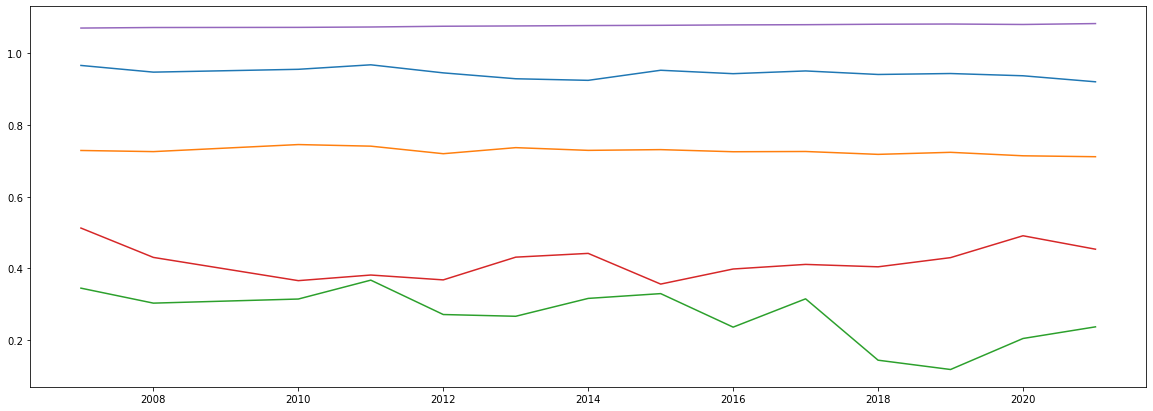

In [107]:
# Unwanted

years_aus = df_aus['year']
lifeladder_aus=df_aus['Life Ladder']
socialsupport_aus=df_aus['Social support']
generosity_aus=df_aus['Generosity']
corruption_aus=df_aus['Perceptions of corruption']
gdp_aus=df_aus['Log GDP per capita']
fig = plt.figure(figsize =(20, 7))
#plt.plot(years_aus,gdp_aus)
plt.plot (years_aus,socialsupport_aus)
plt.plot(years_aus,lifeladder_aus/10)
plt.plot (years_aus,generosity_aus)
plt.plot (years_aus,corruption_aus)
plt.plot (years_aus,gdp_aus/10)


plt.xticks(rotation='horizontal')
plt.yticks(rotation='horizontal')
df_aus


In [ ]:
# Unwanted
plt.bar(years,df_country_aus['Positive affect'],color ='green', width = 0.5)

In [43]:
# Countries participated in the Happiness survey
country_name=pd.DataFrame(new_df2021['Country name'].unique())
country_name


,0
0,Albania
1,Argentina
2,Armenia
3,Australia
4,Austria
...,...
95,United States
96,Uruguay
97,Uzbekistan
98,Zambia
